# Задача 9

Методом прогонки решить разностный аналог граничной задачи для уравнения 

$$y'' = \sin{x}$$

на промежутке $0 < x < \pi$. Рассмотреть различные варианты граничных условий.

## Решение:

In [250]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Метод прогонки

Производную можно переписать через разделенную разность. Уравнение сводится к системе уравнений. 

$$y''(x_i) \approx \frac{y(x_{i-1}) - 2y(x_i) + y(x_{i+1})}{h^2}, \; \; i = 0 ... n-1$$

Можно переписать как

$$y(x_{i-1}) - 2y(x_i) + y(x_{i+1}) = h^2 f(x_i), \; \; i = 0 ... n-1$$

Или в матричном виде: 

$$\begin{pmatrix}
1 & 0 & 0 & 0 &... & 0 & 0 & 0\\
1 & -2 & 1 & 0 & ... & 0 & 0 & 0\\
0 & 1 & -2 & 1 & ... & 0 & 0 & 0 \\
. & . & . & . & ... & . & . & . \\
0 & 0 & 0 & 0 & ... & 1 & -2 & 1 \\
0 & 0 & 0 & 0 & ... & 0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
y(t_0)\\
y(t_1)\\
y(t_2)\\
...\\
y(t_{n-1})\\
y(t_{n})\\
\end{pmatrix} =
\begin{pmatrix}
y(t_0)\\
f(t_1)\\
f(t_2)\\
...\\
f(t_{n-1})\\
y(t_{n})\\
\end{pmatrix}$$

В левой части стоит трехдиагональная матрица. Задам её тремя списками:

* `b` - элементы главной диагонали
* `a` - элементы диагонали под главной
* `с` - элементы диагонали над главной

В каждом списке элементы с индексами $0 ... n$, при этом $a_0 = 0$ и $c_n = 0$.

Вектор-столбец правой части задам списком `d`. В первом и последнем его элементе стоят граничные условия, в остальных - значения функции из правой части уравнения. 

Задача сводится к решению СЛАУ.

In [236]:
def make_system(n, x_0, x_n, y_0, y_n):
    
    h = (x_n - x_0)/n
    
    a = []
    b = []
    c = []
    d = []

    a.append(0)
    b.append(1)
    c.append(0)

    for i in range(1, n):
        a.append(1)
        b.append(-2)
        c.append(1)
    
    a.append(0)
    b.append(1)
    c.append(0)
    
    d = []
    x = []

    d.append(y_0)
    x.append(x_0)

    for i in range(1,n):
        x_i = x_0 + h*i
        d.append(h*h*f(x_i))
        x.append(x_i)

    d.append(y_n)
    x.append(x_n)
    
    A = [a, b, c]
    
    return A, d, x

Систему с трехдиагональной матрицей буду решать методом прогонки: 

Прямой ход метода исключения Гаусса сводится к исключению поддиагональных элементов $a_i$: 

$$\xi \leftarrow \frac{a_i}{b_{i-1}}$$

$$a_i \leftarrow 0, \;\; b_i \leftarrow b_i - \xi c_{i-1}, \;\; d_i \leftarrow d_i - \xi d_{i-1}$$

Обратный ход:

$$x_n = \frac{d_n}{b_n}$$

$$x_i = \frac{1}{b_i}(d_i - c_ix_{i+1}), \;\; i = n-1 ... 0$$

In [243]:
def solve_3diag(A, d, n):
    
    # A = [a, b, c]
    
    d_new = d.copy()
    b_new = A[1].copy()
    c_new = A[2].copy()
    a_new = A[0].copy()
    
    for i in range(1, n+1):
        k = a_new[i] / b_new[i-1]
        b_new[i] -= k*c_new[i-1]
        d_new[i] -= k*d_new[i-1]
    
    y = [i for i in range(n+1)]
    
    y[n] = d_new[n]/b_new[n]
    
    for i in range(n-1, -1, -1):
        y[i] = (d_new[i] - c_new[i]*y[i+1])/b_new[i]
        
    return y

### Аналитическое решение

$$y(x) = -\sin{x} + C_1 x + C_2,$$

где $C_1, \; C_2$ - некоторые константы интегрирования.

Из граничных условий:

$$C_1 = \frac{y(x_0) - y(x_n) + \sin(x_0) - \sin(x_n)}{x_0 - x_n}$$

$$C_2 = y(x_0) + \sin(x_0) - C_1 x_0$$

In [232]:
def solution(x, x_0, x_n, y_0, y_n):
    c1 = (y_0 - y_n + math.sin(x_0) - math.sin(x_n))/(x_0 - x_n)
    c2 = y_0 + math.sin(x_0) - c1*x_0
    
    return -1*math.sin(x) + c1*x + c2

### Вычисления

Задам промежуток и граничные условия:

In [272]:
y_0 = 0
y_n = 2*math.pi

x_0 = - math.pi
x_n = math.pi

Функция в правой части: 

In [273]:
def f(x):
    return math.sin(x)

Количество интервалов разбиения и шаг:

In [274]:
n = 50

h = (x_n - x_0)/n

In [283]:
A, d, x = make_system(n, x_0, x_n, y_0, y_n)
y = solve_3diag(A, d, n)
y_sol = [solution(x_i, x_0, x_n, y_0, y_n) for x_i in x]

### График

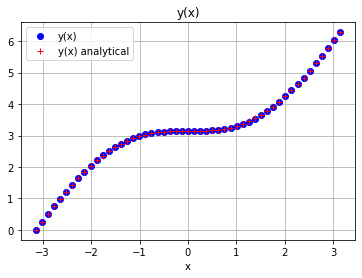

In [284]:
plt.plot(x, y, 'bo', label="y(x)")
plt.plot(x, y_sol, 'r+', label="y(x) analytical")
plt.grid()
plt.xlabel('x')
plt.title('y(x)')
plt.legend()
plt.show()

**Ошибки:**

Посморю модуль разности значений решения методом прогонки и аналитического решения

In [289]:
err = [abs((y[1:][i] - y_sol[1:][i])) for i in range(len(x[1:]))]

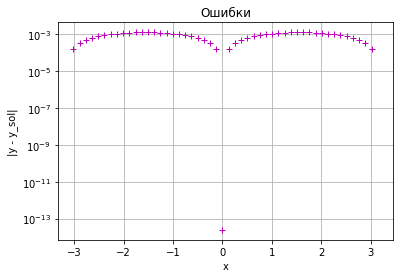

In [290]:
plt.plot(x[1:], err, 'm+', label="|y - y_sol|")
plt.grid()
plt.xlabel('x')
plt.ylabel('|y - y_sol|')
plt.title('Ошибки')
#plt.legend()
plt.yscale("log")
plt.show()